# **Truth Unveiled: Leveraging Natural Language Processing and Machine Learning for Fake News Detection**

# **Introduction**

In recent years, the rise of fake news has become a significant concern for society. With the rise of social media and online news platforms, distinguishing between true and false information is crucial for informed decision-making. This project aims to develop a machine learning model that can effectively identify fake news articles by leveraging Natural Language Processing (NLP) techniques.

The model will analyze the text of news articles to classify them as either "true" or "fake." By utilizing various algorithms and evaluating their performance, this project seeks to provide a robust solution to mitigate the impact of misinformation in today's digital landscape. Ultimately, the goal is to enhance public awareness and promote critical thinking regarding news consumption.





# **Goal of the Project**
**Objective:** The primary objective is to build a reliable model that can classify news articles as "fake" or "true."

**Target Output:** A binary classification output for news articles.

**Key Metrics**: The model will be evaluated based on Accuracy, Precision, Recall, F1 Score and AUC-ROC curve.

# **Overview of the Project**

This project aims to develop a machine learning model to classify news articles as either "True" or "Fake." With the increasing prevalence of misinformation in today's media landscape, accurately identifying credible news sources is essential.

The workflow involves several key steps:

**Data Collection**: Publicly available datasets containing labeled news articles were utilized — one set for true news and another for fake news.

**Data Preprocessing:** The raw data undergoes cleaning and transformation, including handling missing values, removing duplicates, and text preprocessing to enhance the quality of the input for the model.

**Exploratory Data Analysis (EDA):** Various visualizations are created to understand the data distribution, text length, and prominent words in both true and fake articles, providing insights into their characteristics.

**Model Development:** A variety of machine learning models are built, including Logistic Regression, Random Forest, and XGBoost, Naive Bayes and Artificial Neural Network. Each model is evaluated based on its performance metrics.

**Hyperparameter Tuning:** The models are further refined through hyperparameter tuning to optimize their performance.

**Final Evaluation:** The best-performing model is selected based on accuracy, precision, recall, F1 score, and AUC-ROC curve followed by saving the model for future predictions.

**Prediction Interface:** A user-friendly function is created to allow users to input new articles and receive instant classifications, enhancing the practical application of the model.

This project not only demonstrates the application of machine learning techniques but also addresses a critical issue in contemporary society, making it relevant and impactful.

# **Data Story**

[ISOT Fake News Dataset](https://drive.google.com/drive/folders/1PpiNWhgmNBnjLmcjuRelg8jfxTef0lhq?usp=sharing)


The ISOT Fake News dataset is a compilation of several thousands fake news and truthful articles, obtained from different legitimate news sites and sites flagged as unreliable by Politifact.com.

The dataset contains two types of articles fake and real News. This dataset was collected from real
world sources; the truthful articles were obtained by crawling articles from Reuters.com (News
website). As for the fake news articles, they were collected from different sources. The fake news
articles were collected from unreliable websites that were flagged by Politifact (a fact-checking
organization in the USA) and Wikipedia. The dataset contains different types of articles on different
topics, however, the majority of articles focus on political and World news topics.

The dataset consists of two CSV files. The first file named “True.csv” contains more than  21,417
articles from reuter.com. The second file named “Fake.csv” contains more than 23,481 articles from
different fake news outlet resources. Each article contains the following information: article title, text,
type and the date the article was published on. To match the fake news data collected for kaggle.com,
we focused mostly on collecting articles from 2016 to 2017. The data collected were cleaned and
processed, however, the punctuations and mistakes that existed in the fake news were kept in the text.

The following table gives a breakdown of the categories and number of articles per category.

| News       | Size (No. of Articles) | Subjects          |          |
|------------|------------------------|-------------------|----------|
|            |                        | **Type**          | **Article Size** |
| Real-News  | 21417                  | World-News        | 10145    |
|            |                        | Politics-News     | 11272    |
| Fake-News  | 23481                  | Government-News   | 1570     |
|            |                        | Middle-East       | 778      |
|            |                        | US-News           | 783      |
|            |                        | Left-News         | 4459     |
|            |                        | Politics          | 6841     |
|            |                        | News              | 9050     |


# **Import Necessary Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import joblib
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")


The cell above imports all the necessary libraries required for the project. It includes libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), natural language processing (nltk), and machine learning (scikit-learn). Additionally, it imports TensorFlow and Keras for potential deep learning applications. The warnings library is used to suppress unnecessary warnings during execution.

# **Download NLTK Resources**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

The cell above downloads essential resources from the Natural Language Toolkit (NLTK). The stopwords package provides a list of common words (like "and," "the," etc.) that are often excluded from text analysis. The wordnet package is a lexical database that helps in tasks like word similarity and lemmatization, which will be useful for processing and analyzing textual data in the project.

# **Data Preparation**

 **Load True News Dataset**

In [ ]:
# Load datasets with manual labeling
true_df = pd.read_csv('True.csv')
true_df['label'] = 'True'  # Assign "True" to all entries in True.csv
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


The cell above loads the dataset containing true news articles from a CSV file named `True.csv` into a Pandas DataFrame called `true_df`. A new column named `label` is created and assigned the value "True" for all entries, indicating that these articles are verified as true. The DataFrame is then displayed for inspection.

**Check Shape of True News Dataset**

In [ ]:
true_df.shape

(21417, 5)

The cell above retrieves and displays the shape of the true_df DataFrame, which consists of two components: the number of rows and the number of columns. It has 21417 rows and 5 columns.

**Load Fake News Dataset**

In [ ]:
fake_df = pd.read_csv('Fake.csv')
fake_df['label'] = 'Fake'  # Assign "Fake" to all entries in Fake.csv
fake_df

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23498,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23499,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23500,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The cell above loads the dataset containing fake news articles from a CSV file named Fake.csv into a Pandas DataFrame called fake_df. A new column named label is created and assigned the value "Fake" for all entries, indicating that these articles are verified as false. The DataFrame is then displayed for inspection.

**Check Shape of Fake News Dataset**

In [ ]:
fake_df.shape

(23502, 172)

The cell above retrieves and displays the shape of the fake_df DataFrame, which consists of the number of rows and columns. It contains 23502 rows and 172 columns.

**Remove Unnamed Columns from Fake News Dataset**

In [ ]:
fake_df = fake_df.loc[:, ~fake_df.columns.str.contains('^Unnamed')]

The above cell removes any columns from the fake_df DataFrame that are unnamed or have a name that starts with "Unnamed". By filtering out these columns, we ensure that the DataFrame only contains relevant data, making it cleaner and easier to work with in subsequent analyses.

**Display Cleaned Fake News Dataset**

In [ ]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23497,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23498,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23499,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23500,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


**Check Shape of Cleaned Fake News Dataset**

In [ ]:
fake_df.shape

(23502, 5)

Now, fake_df contains 23502 rows and 5 columns.

**Combine True and Fake News Datasets**

In [ ]:
# Combine datasets
data = pd.concat([true_df, fake_df], ignore_index=True)
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44914,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44915,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44916,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44917,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


The above cell combines the true_df and fake_df DataFrames into a single DataFrame named data using the pd.concat() function. The ignore_index=True parameter ensures that the index is reset, creating a continuous index for the combined dataset. The combined DataFrame is displayed for inspection.

**Check Shape of Combined Dataset**

In [ ]:
data.shape

(44919, 5)

The cell above shows that the combined DataFrame contains 44919 rows and 5 columns.

**Check for Null Values in Combined Dataset**

In [ ]:
print(data.isnull().sum())

title       0
text        0
subject    21
date       21
label       0
dtype: int64


The cell above checks for missing values in the combined DataFrame by using the isnull().sum() method. It prints the number of missing values for each column. The columns 'subject' and 'date' have 21 null values.

**Handle Null Values in Combined Dataset**

In [ ]:
# Handle missing values
data = data.dropna()  # Drop missing values
print("Shape after dropping missing values:", data.shape)


Shape after dropping missing values: (44898, 5)


 The dropna() function is utilized to remove any rows that contain null values. Then, the updated shape of the dataset is printed. Now, it has 44898 columns and 5 rows.

**Handling Duplicates**

In [ ]:
# Handle duplicates
data = data.drop_duplicates()  # Drop duplicate entries
print("Shape after dropping duplicates:", data.shape)


Shape after dropping duplicates: (44679, 5)


The drop_duplicates() function is applied to ensure that each record is unique. Then, the updated shape of the dataset is printed. Now, it has 44679 rows and 5 columns.

**Preparing Labels**

In [ ]:
# Prepare labels
data['label'] = data['label'].astype(str).str.lower()  # Convert labels to lowercase
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # Encode labels


In the cell above, we prepare the labels for our dataset. First, all label entries are converted to lowercase to ensure uniformity. Then, LabelEncoder is used to transform the string labels into numerical values, which is a necessary step for most machine learning algorithms that require numerical input.

**Checking Label Counts**

In [ ]:
# Check label counts
class_counts = data['label'].value_counts()
print("Class Distribution:")
print(class_counts)


Class Distribution:
label
0    23468
1    21211
Name: count, dtype: int64


The cell above uses value_counts() function is used to count the occurrences of each label.

Labal 0 has 23468 occurences (fake news)

Label 1 has 21211 occurences (true news)

# **Exploratory Data Analysis (EDA)**

**Visualizing the Distribution of News Articles**

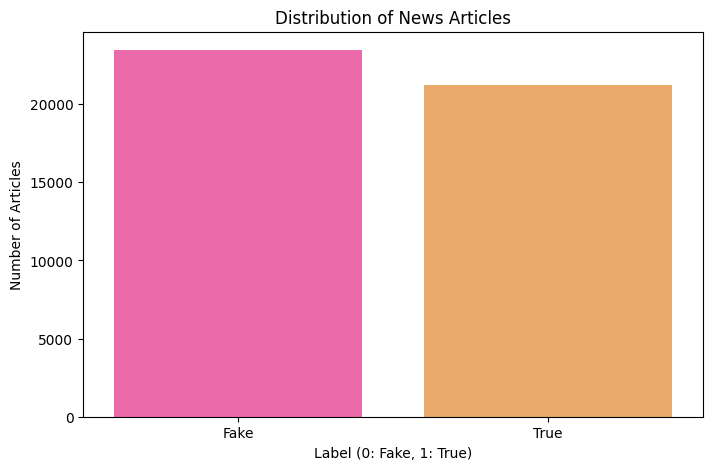

In [ ]:
# Visualize the distribution of true and fake news articles
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='spring')
plt.title('Distribution of News Articles')
plt.xlabel('Label (0: Fake, 1: True)')
plt.ylabel('Number of Articles')
plt.xticks(ticks=[0, 1], labels=['Fake', 'True'])
plt.show()


The above section visualizes the distribution of true and fake news articles in our dataset using a bar plot (by using the Seaborn library).

Labal 0 has 23468 occurences (fake news)

Label 1 has 21211 occurences (true news)

**Generating Word Clouds**

Word clouds can be used to visualize the most frequently occurring words in the dataset.

The plot_word_cloud function concatenates all text entries into a single string and generates a word cloud using the WordCloud library.

This graphical representation emphasizes prominent words, allowing us to easily identify common themes and language used in both true and fake news articles.

In [ ]:
# Word Clouds
def plot_word_cloud(data, title):
    text = ' '.join(data['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


**Word Cloud for True News**

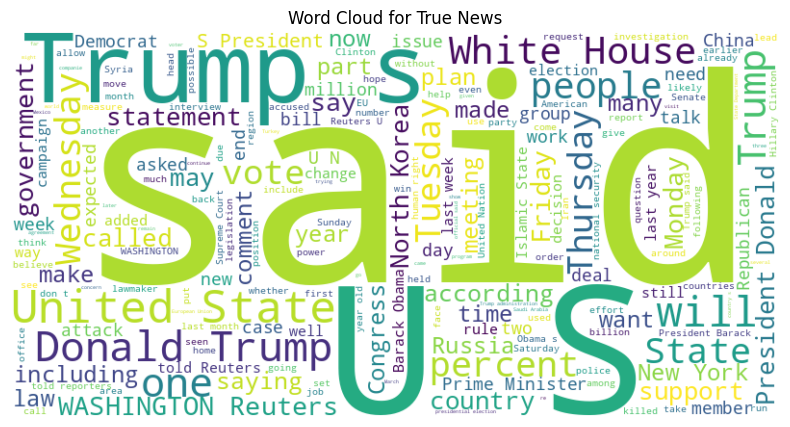

In [ ]:
plot_word_cloud(true_df, 'Word Cloud for True News')

**Observations:**

**High-Frequency Words:** The most prominent words, such as "United," "States," "said," and "Trump," indicate that many true news articles focus on topics related to the United States and statements or actions involving the government, suggesting frequent coverage of political and governmental matters.

**Names and Entities:** Words like "Trump," "White House," "Congress," and "government" suggest a strong focus on political figures and institutions. This aligns with the observation that true news often reports on governmental activities, legislation, and political events.

**Dates and Events:** The presence of words like "Monday," "Tuesday," "Wednesday," "Thursday," and "Friday" indicates that true news articles often mention specific days, likely in the context of scheduled events, statements, or developments.

**Global and Geopolitical References:** Words such as "Russia," "North Korea," "China," and "Islamic State" imply coverage of international issues, geopolitical tensions, and global affairs.

**Common Verbs and Reporting Language:** Words like "said," "statement," "according," and "asked" are typical in news reporting, reflecting journalistic practices of quoting sources and reporting statements.

Overall, the word cloud suggests that true news articles commonly cover political events, government actions, international relations, and scheduled occurrences, with a focus on reporting statements from officials and institutions.

**Word Cloud for Fake News**

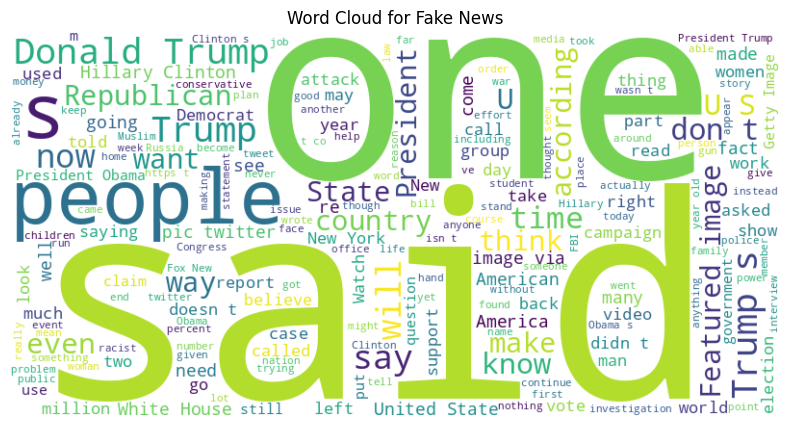

In [ ]:
plot_word_cloud(fake_df, 'Word Cloud for Fake News')

**Observations:**

**Common Words:** The most prominent words include "said," "one," "people," "Trump," and "time." While some of these words are also common in true news articles, the focus on "one," "time," and "people" suggests a more narrative or conversational style, which is often seen in opinionated or less fact-based writing.

**Informal and Conversational Language:** Words like "think," "know," "even," "don't," and "want" suggest a tone that may be more speculative, opinion-based, or less formal, which is characteristic of fake news. These words imply more subjectivity and personal expression.

**Political References:** Similar to true news, political terms like "Trump," "President," "Republican," and "White House" appear frequently, indicating that fake news also covers political topics. However, the tone may be different, as evidenced by the informal language.

**Sensational Phrases and Words:** Words like "attack," "racist," "image," "show," "tweet," and "video" suggest that fake news often employs sensationalism or focuses on viral content. There may be an emphasis on controversial topics or dramatic language.

**Speculation and Accusations:** Words such as "believe," "think," "doesn't," "want," and "know" may reflect speculative statements or unverified claims commonly found in fake news.

Overall, the word cloud for fake news indicates a tendency towards informal, speculative, or sensational language, which may aim to provoke emotional reactions or reinforce certain narratives rather than strictly report factual events. It covers similar political topics as true news but in a different tone and style.

**Analyzing Text Length Distribution**

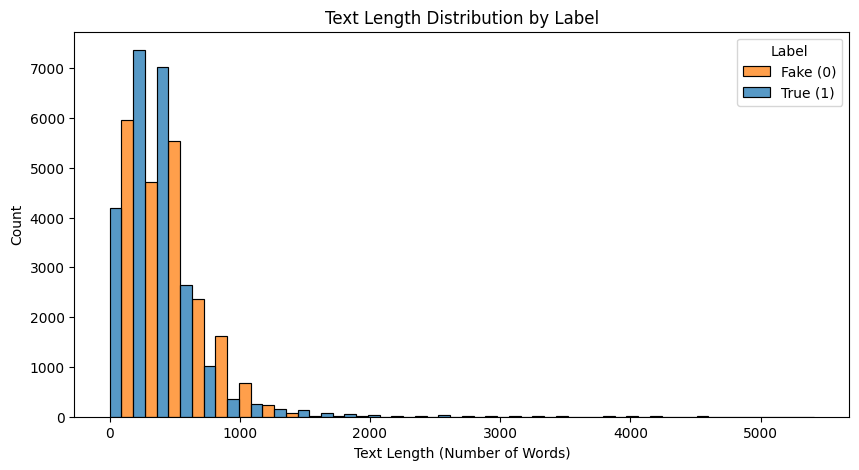

In [ ]:
# Text Length Distribution
data['Text_Length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Text_Length', hue='label', multiple='dodge', bins=30, stat='count', element='bars')
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Fake (0)', 'True (1)'])
plt.show()



**Observations:**

**Distribution Shape:** Both "Fake" and "True" articles generally follow a similar distribution pattern, with a higher concentration of shorter texts and a sharp decline in frequency as the word count increases.

**Peak Range**: The highest count for both categories appears to be around 200-400 words. The "True" articles have a slightly higher peak than the "Fake" ones.

**Longer Texts**: As the text length increases beyond 1000 words, the counts drop significantly for both categories.

**Skewness**: The distribution is right-skewed, indicating that most articles are relatively short, with fewer longer articles.

# **Text Preprocessing**

**Custom Text Preprocessing Transformer**

In [ ]:
# Custom transformer for text preprocessing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = nltk.stem.WordNetLemmatizer()

    def clean_text(self, text):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\W', ' ', text)  # Remove non-word characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
        return text.lower().strip()  # Lowercase and strip whitespace

    def remove_stopwords_and_lemmatize(self, text):
        tokens = text.split()
        lemmatized_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
        return ' '.join(lemmatized_tokens)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_cleaned = [self.clean_text(text) for text in X]
        X_processed = [self.remove_stopwords_and_lemmatize(text) for text in X_cleaned]
        return X_processed

The cell above defines a custom transformer named TextPreprocessor for cleaning and preprocessing textual data.

It includes several key functions:

**clean_text:** This method removes URLs, non-word characters, numbers, and extra whitespace while converting text to lowercase.

**remove_stopwords_and_lemmatize:** This method splits the cleaned text into tokens, removes stopwords, and applies lemmatization to reduce words to their base forms.

The transformer implements the **fit and transform methods**, making it compatible with Scikit-learn's pipeline framework.

By applying this preprocessing step, we ensure that the text data is in an optimal format for further analysis and model training.

# **Feature and Label Preparation**

**Combining Title and Text**

In [ ]:
data['combined_text'] = data['title'] + " " + data['text']

The cell above creates a new column, combined_text, by concatenating the title and text fields from our dataset. This combined text will serve as the primary feature for our subsequent analyses and model training.

**Preparing Features and Labels**

In [ ]:
# Prepare features and labels
X = data['combined_text']
y = data['label']


The combined_text column, which contains the concatenated title and body of each article, is assigned to the variable X as the input feature set.

The label column, which represents the target variable indicating whether an article is true or fake, is assigned to y.

**Splitting the Dataset**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The cell above splits our dataset into training and testing subsets using the train_test_split function.

The features X and labels y are divided, with 80% of the data allocated for training and 20% reserved for testing.

The random_state parameter is set for reproducibility, allowing us to obtain the same split during future runs of the code.

# **Model Building**

**Function to build Machine Learning Models**

In [ ]:
# Function to build models
def build_models():
    models = {
        'Logistic Regression': Pipeline([
            ('tfidf', TfidfVectorizer()),  # Add text vectorization
            ('clf', LogisticRegression())
        ]),
        'Random Forest': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', RandomForestClassifier())
        ]),
        'XGBoost': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
        ]),
        'Naive Bayes': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', MultinomialNB())
        ]),
        'Artificial Neural Network': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', MLPClassifier(max_iter=20))
        ])

    }

    return models


The cell above defines a function called build_models that constructs a dictionary of machine learning models, each encapsulated within a Scikit-learn Pipeline.

Each model includes:

**Text Vectorization:** A TfidfVectorizer is used to convert the text data into a numerical format suitable for modeling.

**Classifiers:** Different classifiers used are Logistic Regression, Random Forest, XGBoost, Naive Bayes, Artificial Neural Network (ANN).

# **Functions for Model Evaluation**

**Function to Evaluate Model Performance**

In [ ]:
# Function to Evaluate Model Performance
from sklearn.metrics import roc_curve, auc

def evaluate_model_performance(model, X_train, y_train, X_test, y_test, model_name=None):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    test_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Calculate metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred),
        'F1 Score': f1_score(y_test, test_pred),
        'AUC': auc(*roc_curve(y_test, test_prob)[:2])  # Calculate AUC
    }

    print(f"\n\n{model_name} - \n\nMetrics:\n", metrics)
    print("\nClassification Report:\n")
    print(classification_report(y_test, test_pred))

    # Plot ROC curve
    print("\nROC Curve:\n")
    fpr, tpr, _ = roc_curve(y_test, test_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {metrics["AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Check for overfitting
    if metrics['Train Accuracy'] - metrics['Test Accuracy'] > 0.1:
        print(f"Warning: {model_name} may be overfitting!")

    # Plot confusion matrix
    print("\nConfusion Matrix:\n")
    plot_confusion_matrix(y_test, test_pred, model_name)

    return metrics




The cell above defines a function, evaluate_model_performance, which assesses the performance of a given machine learning model on training and testing datasets.

The function fits the model to the training data and makes predictions for both training and testing sets.

It calculates various performance metrics, including accuracy, precision, recall, F1 score, and AUC (Area Under the ROC Curve).

The AUC is derived from the ROC curve, which is plotted to visualize the trade-off between the true positive rate and false positive rate.

The function also checks for overfitting by comparing training and testing accuracies.

It then prints a confusion matrix to provide insights into the classification results.



**Function to plot Confusion metrics**

In [ ]:
# Function to Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

The plot_confusion_matrix function visualizes the performance of a classification model by creating a heatmap of the confusion matrix.

It takes the true labels (y_true), predicted labels (y_pred), and the model's name as inputs.

The function calculates the confusion matrix and uses Seaborn to display it as a heatmap, with annotations for the count of predictions.

The axes are labeled with the true and predicted labels, and a title indicating the model's name is included for clarity.

# **Function for Tuning Hyperparameters**

In [ ]:
# Function for  Hyperparameter Tuning
def tune_hyperparameters(models, X_train, y_train):
    param_distributions = {
        'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1]},
        'Random Forest': {'clf__n_estimators': [10, 50], 'clf__max_depth': [None, 10]},
        'XGBoost': {'clf__n_estimators': [10, 50], 'clf__max_depth': [3], 'clf__reg_lambda': [0, 0.1, 1]},
        'Naive Bayes': {},  # No hyperparameters for Naive Bayes
        'Artificial Neural Network': {'clf__hidden_layer_sizes': [(16,)], 'clf__max_iter': [20], 'clf__alpha': [0.0001, 0.001, 0.01]}
    }

    best_models = {}
    for name, model in models.items():
        randomized_search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, cv=2, n_jobs=1, random_state=42)
        randomized_search.fit(X_train, y_train)
        best_models[name] = randomized_search.best_estimator_
        print(f"{name} Best Hyperparameters: {randomized_search.best_params_}")

    return best_models

The tune_hyperparameters function optimizes the performance of various machine learning models by performing hyperparameter tuning.

It takes a dictionary of models along with the training features (X_train) and labels (y_train).

The function defines a set of hyperparameter distributions for the different classifiers.

For each model, it utilizes RandomizedSearchCV to explore the specified hyperparameter combinations, fitting the model to the training data and identifying the best hyperparameters based on cross-validation.

The function then prints the best hyperparameters for each model and returns a dictionary of the best models.

# **Initial Model Evaluation**

INITIAL MODEL EVALUATION:



Logistic Regression - 

Metrics:
 {'Train Accuracy': 0.9928937134543827, 'Test Accuracy': 0.9880259623992838, 'Precision': 0.9882131070249882, 'Recall': 0.9865850788420805, 'F1 Score': 0.9873984218584383, 'AUC': 0.9985975439796501}

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4687
           1       0.99      0.99      0.99      4249

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


ROC Curve:



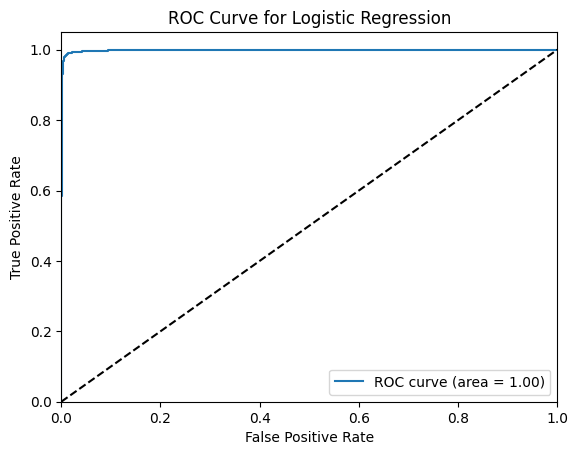


Confusion Matrix:



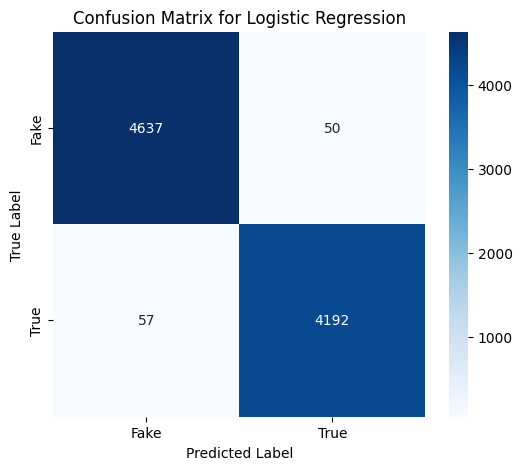



Random Forest - 

Metrics:
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.9909355416293644, 'Precision': 0.9926713947990544, 'Recall': 0.9882325253000706, 'F1 Score': 0.9904469866729567, 'AUC': 0.9994784600982684}

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4687
           1       0.99      0.99      0.99      4249

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


ROC Curve:



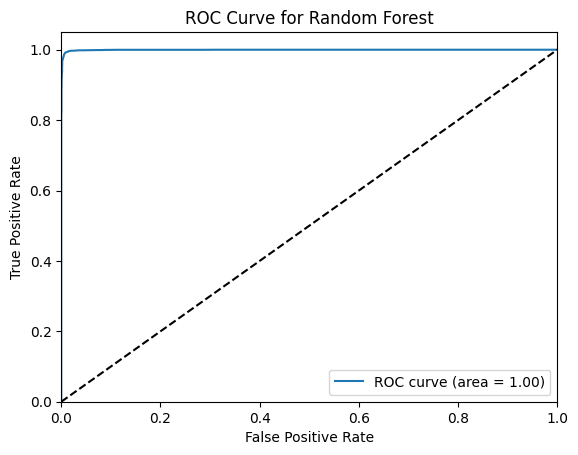


Confusion Matrix:



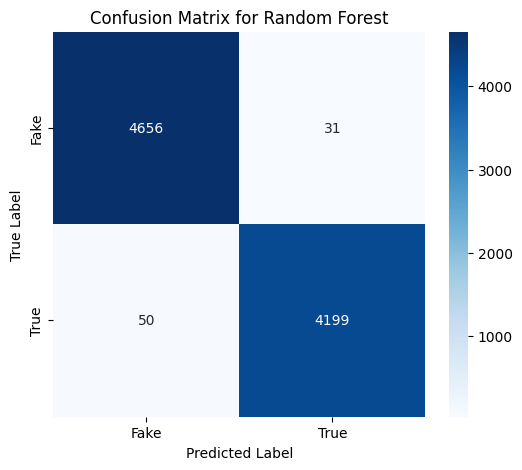



XGBoost - 

Metrics:
 {'Train Accuracy': 0.9999720224939149, 'Test Accuracy': 0.997538048343778, 'Precision': 0.9964763918252291, 'Recall': 0.9983525535420099, 'F1 Score': 0.9974135904067717, 'AUC': 0.9998400205914487}

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      4249

    accuracy                           1.00      8936
   macro avg       1.00      1.00      1.00      8936
weighted avg       1.00      1.00      1.00      8936


ROC Curve:



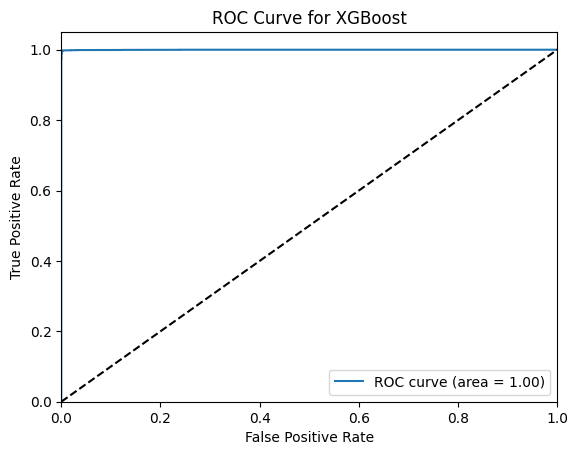


Confusion Matrix:



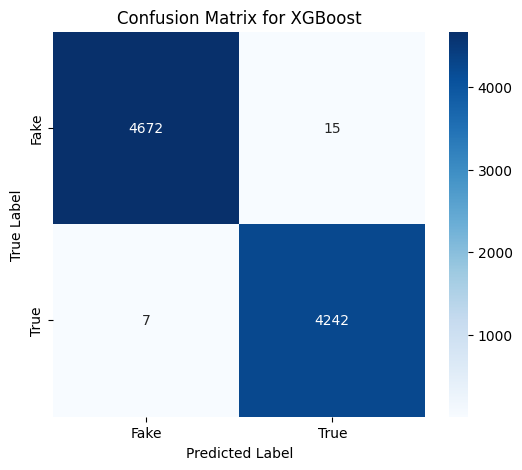



Naive Bayes - 

Metrics:
 {'Train Accuracy': 0.946423075847019, 'Test Accuracy': 0.9390107430617726, 'Precision': 0.9447646493756003, 'Recall': 0.9258649093904449, 'F1 Score': 0.9352193034589326, 'AUC': 0.9848126013962396}

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4687
           1       0.94      0.93      0.94      4249

    accuracy                           0.94      8936
   macro avg       0.94      0.94      0.94      8936
weighted avg       0.94      0.94      0.94      8936


ROC Curve:



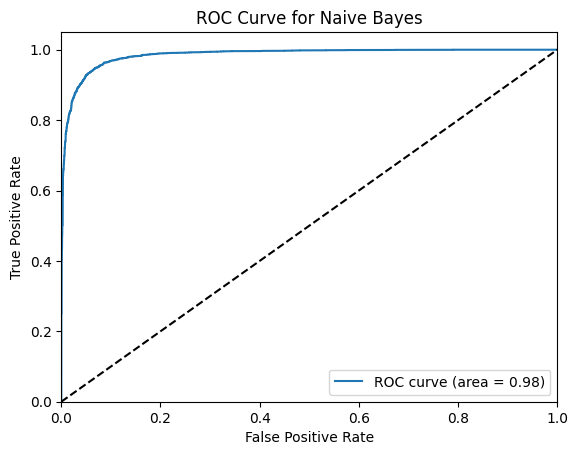


Confusion Matrix:



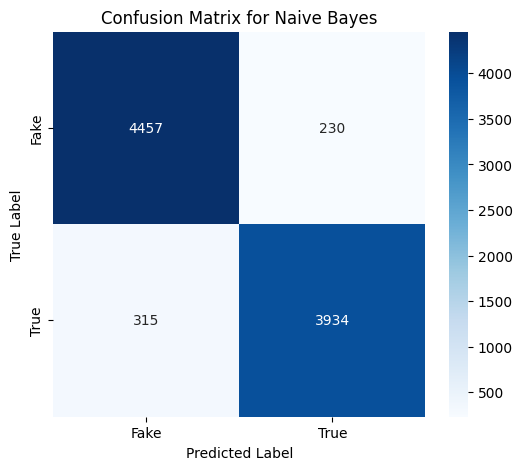



Artificial Neural Network - 

Metrics:
 {'Train Accuracy': 0.9999720224939149, 'Test Accuracy': 0.9927260519247986, 'Precision': 0.9917724494593324, 'Recall': 0.9929395151800423, 'F1 Score': 0.9923556391861695, 'AUC': 0.9995895569097621}

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4687
           1       0.99      0.99      0.99      4249

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


ROC Curve:



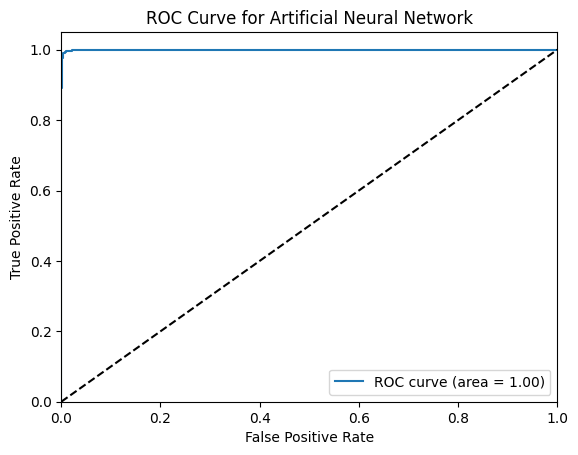


Confusion Matrix:



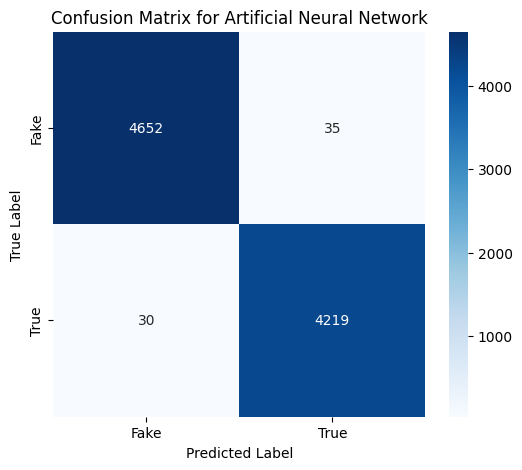

In [ ]:
# Initial Model Evaluation
from sklearn.metrics import confusion_matrix

print("INITIAL MODEL EVALUATION:\n")
initial_models = build_models()
initial_metrics = {}

for model_name, model in initial_models.items():
    metrics = evaluate_model_performance(model, X_train, y_train, X_test, y_test, model_name)
    initial_metrics[model_name] = metrics


**Observations:**

**Best Overall Model:** XGBoost performs the best overall with the highest test accuracy of 0.9975, precision of 0.9965, recall of 0.9984, F1 score of 0.9974, and AUC of 0.9998. This indicates that XGBoost is highly effective in both correctly identifying positive cases and minimizing false positives.

**Low Variance Between Training and Testing Accuracy:** For each model, the training and testing accuracies are almost identical. This low variance suggests that none of the models are overfitting the training data, which indicates good generalization to new data.

# **Hyperparameter Tuning**

In [ ]:
# Hyperparameter Tuning
best_models = tune_hyperparameters(initial_models, X_train, y_train)

Logistic Regression Best Hyperparameters: {'clf__C': 0.1}
Random Forest Best Hyperparameters: {'clf__n_estimators': 50, 'clf__max_depth': None}
XGBoost Best Hyperparameters: {'clf__reg_lambda': 0, 'clf__n_estimators': 50, 'clf__max_depth': 3}
Naive Bayes Best Hyperparameters: {}
Artificial Neural Network Best Hyperparameters: {'clf__max_iter': 20, 'clf__hidden_layer_sizes': (16,), 'clf__alpha': 0.01}


# **Final Model Evaluation**


FINAL MODEL EVALUATION:


Logistic Regression - 

Metrics:
 {'Train Accuracy': 0.9755476596816159, 'Test Accuracy': 0.9752685765443151, 'Precision': 0.9712213383247543, 'Recall': 0.9769357495881383, 'F1 Score': 0.9740701630881146, 'AUC': 0.9957074200568685}

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4687
           1       0.97      0.98      0.97      4249

    accuracy                           0.98      8936
   macro avg       0.98      0.98      0.98      8936
weighted avg       0.98      0.98      0.98      8936


ROC Curve:



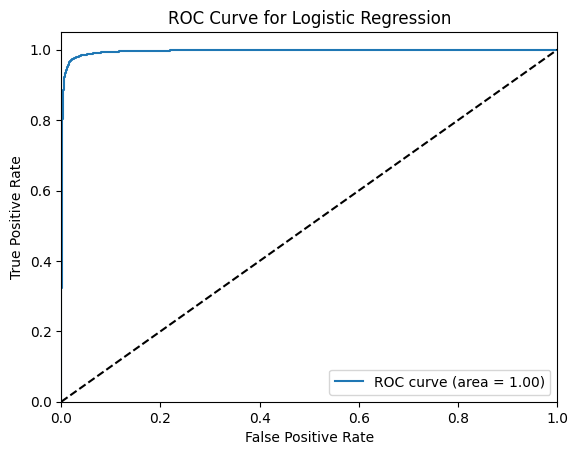


Confusion Matrix:



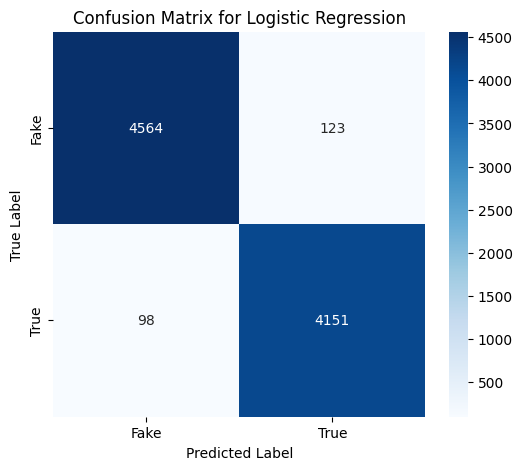



Random Forest - 

Metrics:
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.9865711727842436, 'Precision': 0.9904965550011879, 'Recall': 0.981172040480113, 'F1 Score': 0.9858122487585718, 'AUC': 0.9991211426245551}

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4687
           1       0.99      0.98      0.99      4249

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


ROC Curve:



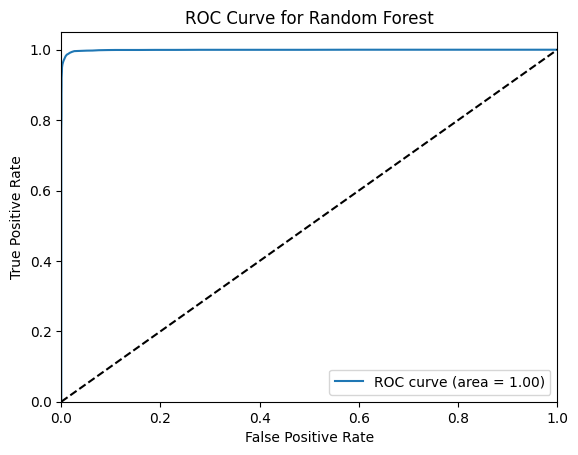


Confusion Matrix:



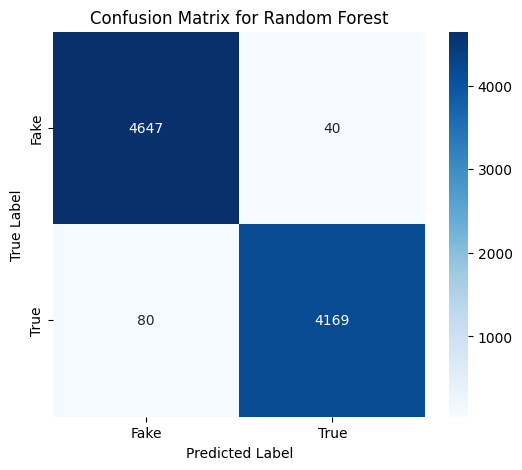



XGBoost - 

Metrics:
 {'Train Accuracy': 0.9996922474330638, 'Test Accuracy': 0.9974261414503134, 'Precision': 0.9964755639097744, 'Recall': 0.9981172040480113, 'F1 Score': 0.9972957084068195, 'AUC': 0.9998696966210953}

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      4249

    accuracy                           1.00      8936
   macro avg       1.00      1.00      1.00      8936
weighted avg       1.00      1.00      1.00      8936


ROC Curve:



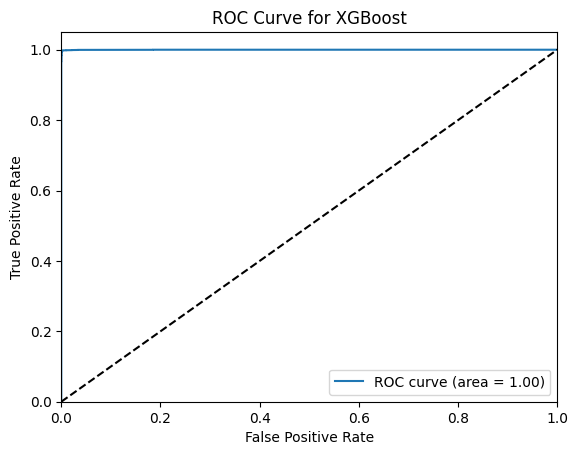


Confusion Matrix:



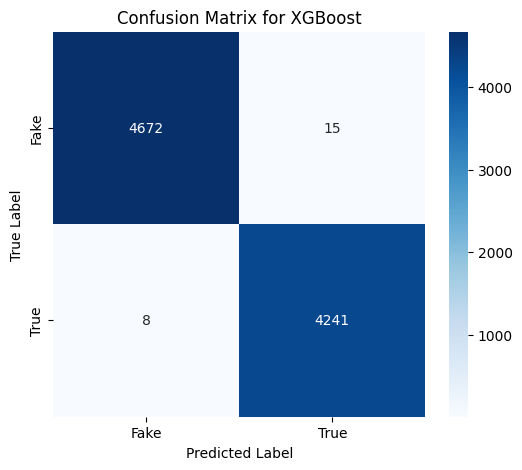



Naive Bayes - 

Metrics:
 {'Train Accuracy': 0.946423075847019, 'Test Accuracy': 0.9390107430617726, 'Precision': 0.9447646493756003, 'Recall': 0.9258649093904449, 'F1 Score': 0.9352193034589326, 'AUC': 0.9848126013962396}

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4687
           1       0.94      0.93      0.94      4249

    accuracy                           0.94      8936
   macro avg       0.94      0.94      0.94      8936
weighted avg       0.94      0.94      0.94      8936


ROC Curve:



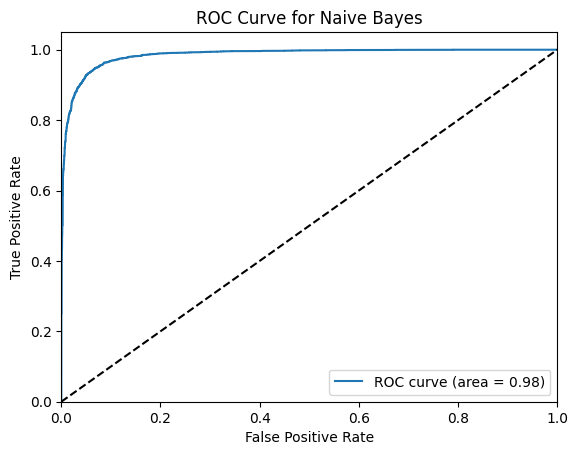


Confusion Matrix:



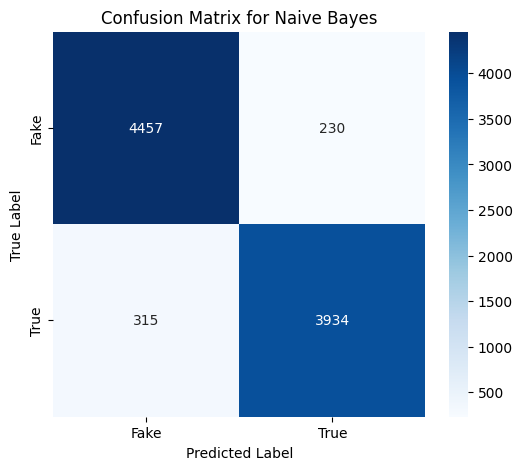



Artificial Neural Network - 

Metrics:
 {'Train Accuracy': 0.9999160674817447, 'Test Accuracy': 0.9941808415398389, 'Precision': 0.994812544211271, 'Recall': 0.9929395151800423, 'F1 Score': 0.9938751472320377, 'AUC': 0.9995604332258452}

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4687
           1       0.99      0.99      0.99      4249

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936


ROC Curve:



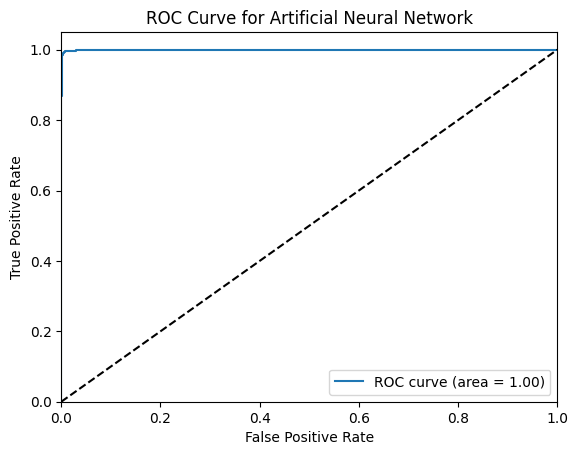


Confusion Matrix:



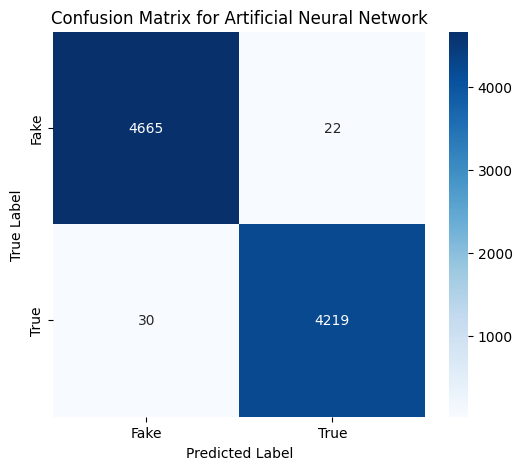

In [ ]:
# Final Model Evaluation
final_metrics = {}

print("\nFINAL MODEL EVALUATION:")
for model_name, model in best_models.items():
    metrics = evaluate_model_performance(model, X_train, y_train, X_test, y_test, model_name)
    final_metrics[model_name] = metrics




**Observation:**

**Best Overall Model:** XGBoost stands out as the best-performing model with a test accuracy of 0.9974, precision of 0.9965, recall of 0.9981, F1 score of 0.9973, and AUC of 0.9998. This indicates that XGBoost effectively captures both positive and negative classes with minimal errors.

# **Identifying the Best Model**

In [ ]:
# Identifying the best model

# Assuming final_metrics is a dictionary containing metrics for each model
best_model_name = max(final_metrics, key=lambda x: final_metrics[x]['Test Accuracy'])

# Retrieve the metrics for the best model
best_model_metrics = final_metrics[best_model_name]

# Print the results
print(f"The best model is: {best_model_name}")
print("Metrics for the best model:")
for metric_name, metric_value in best_model_metrics.items():
    print(f"{metric_name}: {metric_value}")



The best model is: XGBoost
Metrics for the best model:
Train Accuracy: 0.9996922474330638
Test Accuracy: 0.9974261414503134
Precision: 0.9964755639097744
Recall: 0.9981172040480113
F1 Score: 0.9972957084068195
AUC: 0.9998696966210953


# **Saving the Best Model**

In [ ]:
# Save the Best Model

joblib.dump(best_models[best_model_name], 'best_fake_news_detection_model.pkl')

['best_fake_news_detection_model.pkl']

The cell above saves the best-performing model to a file for future use.

We select the optimized model stored in the best_models dictionary, corresponding to the best_model_name identified in the previous section.

The joblib.dump function is used to save the model to a file named 'best_fake_news_detection_model.pkl'.

# **Prediction Interface**

**Prediction Function for Client Use**

In [ ]:
# Function for client use
def predict_news(title, text):
    model = joblib.load('best_fake_news_detection_model.pkl')
    combined_article = f"{title} {text}"  # Combine title, text for prediction
    prediction = model.predict([combined_article])
    return label_encoder.inverse_transform(prediction)[0]

The cell above defines a function called predict_news, which allows users to make predictions about the veracity of news articles.

The steps involved are:

The function begins by loading the pre-trained model from the saved file 'best_fake_news_detection_model.pkl' using joblib.load.

The function takes a news article's title and text as input and combines them into a single string, which is formatted for prediction.

The combined article is then passed to the model's predict method, which generates a prediction based on the model's training.

Finally, the predicted label is transformed back to its original form (e.g., "True" or "Fake") using the label_encoder.

**Example Prediction**

In [ ]:
# Example prediction
new_title = "Government Announces Free Energy for All Citizens Starting Next Month"
new_article = "In a shocking new policy, the U.S. government has announced that all citizens will receive free energy starting next month. This groundbreaking initiative aims to reduce living costs and promote environmental sustainability. Experts, however, are skeptical about the feasibility of such a program, citing concerns over funding and implementation."
result = predict_news(new_title, new_article)
print(f"The article is classified as: {result}")


The article is classified as: fake


# **Conclusion**
This project successfully developed a machine learning model to detect fake news articles using Natural Language Processing (NLP) techniques. Various models, including Logistic Regression, Random Forest, XGBoost, Naive Bayes, and Artificial Neural Networks, were evaluated on a dataset of labeled true and fake news articles. The model demonstrated promising accuracy in classifying news articles, contributing to ongoing efforts to combat misinformation.

# **Limitations**
**Decreased Accuracy Post-Tuning** : After hyperparameter tuning, the models exhibited decreased accuracy compared to their initial performance, despite not indicating signs of overfitting. This decline in performance arose from adjustments made to model parameters due to extended execution times, which limited the exploration of optimal configurations.

**Limited Training Duration for Neural Network** : The neural network was trained with a limited number of iterations (max_iter=20), which may not be adequate for achieving convergence. This limitation could result in suboptimal performance compared to models that benefit from longer training durations. The decision to set max_iter to 20 was made due to prolonged execution times, with no output received after waiting for hours, potentially attributed to resource constraints.

# **Future Work**

**Real-time Detection:** Developing a real-time news detection system could enhance the practical applicability of the model, allowing users to verify news articles as they encounter them online.

**User Interface Development:** Creating a user-friendly interface for the model could facilitate its use by non-technical users, making it more accessible to a broader audience.